In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
# Importing Liberaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix

In [3]:
# Loading Data
fraud_data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
# Viewing Raw Data
set_option('display.width', 100)
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Dimension of data
fraud_data.shape

(284807, 31)

In [6]:
# Data Type
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

> Our observations are as 

> NaN values do not present in the data set. Because of the Non-Null Count and number of rows in the dataset match.

> There are 29 Input Variables and 1 Output Variable (Class)

> The data type of all the input variables is float64 whereas the data type of out variable (Class) is int64

In [7]:
# CHecking Null values
fraud_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Summarizing data
set_option('precision', 5)
fraud_data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,...,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,2.84807e+05,284807.00000,284807.00000
mean,94813.85958,1.16837e-15,3.41691e-16,-1.37954e-15,2.07410e-15,9.60407e-16,1.48731e-15,-5.55647e-16,1.21348e-16,-2.40633e-15,...,1.65407e-16,-3.56859e-16,2.57865e-16,4.47327e-15,5.34091e-16,1.68344e-15,-3.66009e-16,-1.22739e-16,88.34962,0.00173
std,47488.14595,1.95870e+00,1.65131e+00,1.51626e+00,1.41587e+00,1.38025e+00,1.33227e+00,1.23709e+00,1.19435e+00,1.09863e+00,...,7.34524e-01,7.25702e-01,6.24460e-01,6.05647e-01,5.21278e-01,4.82227e-01,4.03632e-01,3.30083e-01,250.12011,0.04153
min,0.00000,-5.64075e+01,-7.27157e+01,-4.83256e+01,-5.68317e+00,-1.13743e+02,-2.61605e+01,-4.35572e+01,-7.32167e+01,-1.34341e+01,...,-3.48304e+01,-1.09331e+01,-4.48077e+01,-2.83663e+00,-1.02954e+01,-2.60455e+00,-2.25657e+01,-1.54301e+01,0.00000,0.00000
25%,54201.50000,-9.20373e-01,-5.98550e-01,-8.90365e-01,-8.48640e-01,-6.91597e-01,-7.68296e-01,-5.54076e-01,-2.08630e-01,-6.43098e-01,...,-2.28395e-01,-5.42350e-01,-1.61846e-01,-3.54586e-01,-3.17145e-01,-3.26984e-01,-7.08395e-02,-5.29598e-02,5.60000,0.00000
50%,84692.00000,1.81088e-02,6.54856e-02,1.79846e-01,-1.98465e-02,-5.43358e-02,-2.74187e-01,4.01031e-02,2.23580e-02,-5.14287e-02,...,-2.94502e-02,6.78194e-03,-1.11929e-02,4.09761e-02,1.65935e-02,-5.21391e-02,1.34215e-03,1.12438e-02,22.00000,0.00000
75%,139320.50000,1.31564e+00,8.03724e-01,1.02720e+00,7.43341e-01,6.11926e-01,3.98565e-01,5.70436e-01,3.27346e-01,5.97139e-01,...,1.86377e-01,5.28554e-01,1.47642e-01,4.39527e-01,3.50716e-01,2.40952e-01,9.10451e-02,7.82800e-02,77.16500,0.00000
max,172792.00000,2.45493e+00,2.20577e+01,9.38256e+00,1.68753e+01,3.48017e+01,7.33016e+01,1.20589e+02,2.00072e+01,1.55950e+01,...,2.72028e+01,1.05031e+01,2.25284e+01,4.58455e+00,7.51959e+00,3.51735e+00,3.16122e+01,3.38478e+01,25691.16000,1.00000


In [9]:
# Response Variable Analysis
class_names = {0:'Not Fraud', 1:'Fraud'}
rvs = fraud_data.Class.value_counts().rename(index = class_names)
print(rvs)

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


***Splitting data into training and testing data***

In [10]:
from sklearn.model_selection import train_test_split

y= fraud_data["Class"]
X = fraud_data.loc[:, fraud_data.columns != 'Class']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=1/6, random_state=42)

# Data Modelling

***Logistic Regression***

In [11]:
#Import Library for Accuracy Score
from sklearn.metrics import accuracy_score

#Import Library for Logistic Regression
from sklearn.linear_model import LogisticRegression

#Initialize the Logistic Regression Classifier
logisreg = LogisticRegression()

#Train the model using Training Dataset
logisreg.fit(X_train, y_train)

# Prediction using test data
y_pred = logisreg.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_logisreg = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logisreg )

Accuracy of Logistic Regression model :  99.87


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


***Linear Discriminent Analysis***

In [12]:
#Import Library for Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Initialize the Linear Discriminant Analysis Classifier
model = LinearDiscriminantAnalysis()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_lda = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Linear Discriminant Analysis Classifier: ', acc_lda )

Accuracy of Linear Discriminant Analysis Classifier:  99.93


***Gaussian Naive Bayes***

In [13]:
#Import Library for Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Initialize the Gaussian Naive Bayes Classifier
model = GaussianNB()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_ganb = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes : ', acc_ganb )

Accuracy of Gaussian Naive Bayes :  99.3


***Decision Tree***

In [14]:
#Import Library for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_dtree = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Decision Tree Classifier : ', acc_dtree )

Accuracy of  Decision Tree Classifier :  99.9


***Random Forest***

In [15]:
#Import Library for Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initialize the Random Forest
model = RandomForestClassifier()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_rf = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Random Forest : ', acc_rf )

Accuracy of  Random Forest :  99.96


***Support Vector Machine***

In [16]:
#Import Library for Support Vector Machine
from sklearn import svm

#Initialize the Support Vector Classifier
model = svm.SVC()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_svc = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Support Vector Classifier: ', acc_svc )

Accuracy of Support Vector Classifier:  99.83


***KNN***

In [17]:
#Import Library for K Nearest Neighbour Model
from sklearn.neighbors import KNeighborsClassifier

#Initialize the K Nearest Neighbour Model with Default Value of K=5
model = KNeighborsClassifier()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_knn = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN Classifier: ', acc_knn )

Accuracy of KNN Classifier:  99.84


# Model Selection

In [18]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

models.sort_values(by='Score', ascending=False)


,Model,Score
4,Random Forest,99.96
1,Linear Discriminant Analysis,99.93
3,Decision Tree,99.90
0,Logistic Regression,99.87
6,K - Nearest Neighbors,99.84
5,Support Vector Machines,99.83
2,Naive Bayes,99.30


>The Best model for Predicting in **Random Forest Model** with **99.96% Accuracy**

# Confusion Matrix
This is a binary classification problem (Fraud or No-Fraud). Some of the commonly used terms are:
* True positives (TP)
        Predicted positive and are actually positive.
* False positives (FP)
        Predicted positive and are actually negative.
* True negatives (TN)
        Predicted negative and are actually negative.
* False negatives (FN)
        Predicted negative and are actually positive.

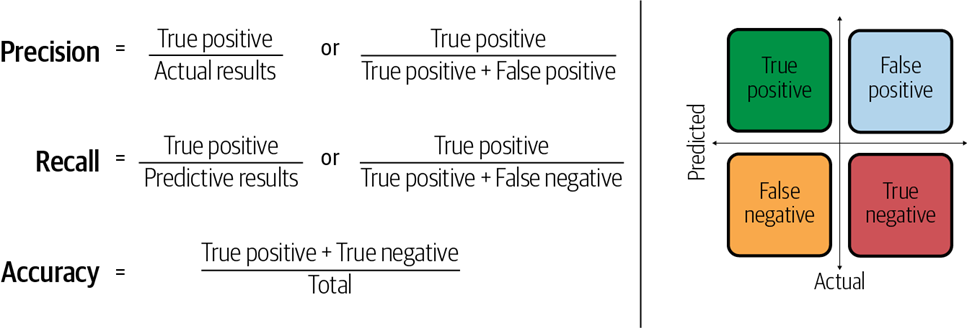

[[47388     0]
 [   77     3]]


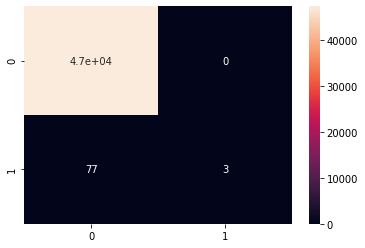

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot = True);

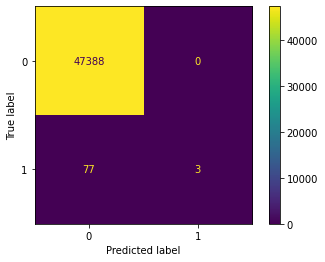

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test);

* In this case, overall accuracy is strong, but the confusion metrics tell a different story. 
* Despite the high accuracy level, 36 out of 164 instances of fraud are missed and incorrectly predicted as nonfraud. 
* The false-negative rate is substantial. 
* The intention of a fraud detection model is to minimize these false negatives.

**Dont Forgot Upvote!!!!!!**